## Shared Micromobility Vehicle Trips Data Analysis

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [1]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
#import seaborn as sns
import pandas as pd
from sodapy import Socrata

In [2]:
# Output File (CSV)
output_data_file = "Output_Data/shared_mobility.csv"

In [3]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.head()

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30T06:45:17.000,9,9,scooter,170,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30T06:45:17.000,9,9,scooter,90,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30T06:45:17.000,9,9,scooter,570,826,2019-04-29T17:15:00.000,2019-04-29T17:15:00.000,4,17,1,2019,48453001100,48453001100


In [5]:
# Check for missing values:
results_df.count()

trip_id                   10000
device_id                 10000
modified_date             10000
council_district_start    10000
council_district_end      10000
vehicle_type               9999
trip_duration              9999
trip_distance              9999
start_time                 9999
end_time                   9999
month                      9999
hour                       9999
day_of_week                9999
year                       9999
census_geoid_start         9998
census_geoid_end           9998
dtype: int64

In [6]:
missing_vehicle_type = results_df["vehicle_type"].isnull().sum()
print(f"There are {missing_vehicle_type} missing vehicle types.")
missing_month = results_df["month"].isnull().sum()
print(f"There are {missing_month} missing months.")
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

There are 1 missing vehicle types.
There are 1 missing months.
There are 2 missing census_geoid_start.


### Data Cleaning

In [7]:
clean_results_df = results_df.copy()

In [8]:
clean_results_df

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30T06:45:17.000,9,9,scooter,170,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30T06:45:17.000,9,9,scooter,90,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30T06:45:17.000,9,9,scooter,570,826,2019-04-29T17:15:00.000,2019-04-29T17:15:00.000,4,17,1,2019,48453001100,48453001100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,566897a3-08b6-4771-b4c3-a9c353ceb534,a962cce8-5866-4ec2-8c73-1c8a8e84a449,2019-04-28T04:00:15.000,9,9,scooter,1110,393,2019-04-27T16:15:00.000,2019-04-27T16:30:00.000,4,16,6,2019,48453001305,48453001305
9996,745c8827-ff3c-42f4-8f19-c0bedc1e2e9d,8769ba2f-440b-4c36-8cd1-8ba140fb629d,2019-04-28T04:00:15.000,5,1,scooter,1366,4662,2019-04-27T16:15:00.000,2019-04-27T16:45:00.000,4,16,6,2019,48453001303,48453001100
9997,e9afb803-0c66-4263-85fe-1b36c5734200,676ac48b-ae2e-4874-80db-2d98de06179e,2019-04-28T04:00:15.000,5,5,scooter,288,882,2019-04-27T16:30:00.000,2019-04-27T16:45:00.000,4,16,6,2019,48453002005,48453001304
9998,3de91b86-eaf9-4d01-996f-85e22be4b7cd,3064cf57-c2b1-4b88-9d66-eaa9440c11d9,2019-04-28T04:00:15.000,9,9,scooter,36,44,2019-04-27T16:45:00.000,2019-04-27T16:45:00.000,4,16,6,2019,48453001100,48453001100


In [9]:
clean_results_df = clean_results_df.rename(columns = {
    "trip_id": "Trip ID",
    "device_id": "Device ID",
    "modified_date": "Data Modified Date",
    "vehicle_type": "Vehicle Type",
    "trip_duration": "Trip Duration",
    "trip_distance": "Trip Distance",
    "start_time": "Trip Start Time",
    "end_time": "Trip End Time",
    "hour": "Hour",
    "day_of_week": "Day Of Week",
    "month": "Month",
    "year": "Year",
    "census_geoid_start": "GEOID Start",
    "census_geoid_end": "GEOID End",
    "council_district_start": "Start Council District",
    "council_district_end" : "Return Council District"
})

In [10]:
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30T06:45:17.000,9,9,scooter,170,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30T06:45:17.000,9,9,scooter,90,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30T06:45:17.000,9,9,scooter,570,826,2019-04-29T17:15:00.000,2019-04-29T17:15:00.000,4,17,1,2019,48453001100,48453001100


In [11]:
#Find the total number of scooter rides:
scooters = clean_results_df[clean_results_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_results_df) - scooters.shape[0]
total_scooters

465

In [12]:
#Find the total number of bicycle rides:
bicycles = clean_results_df[clean_results_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_results_df) - bicycles.shape[0]
total_bicycles

9536

In [13]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

10001

In [14]:
# Drop all the null values
clean_results_df = clean_results_df.dropna(how='any')
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30T06:45:17.000,9,9,scooter,170,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30T06:45:17.000,9,9,scooter,90,0,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30T06:45:17.000,9,9,scooter,570,826,2019-04-29T17:15:00.000,2019-04-29T17:15:00.000,4,17,1,2019,48453001100,48453001100
5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30T06:45:17.000,9,9,scooter,438,1815,2019-04-29T17:30:00.000,2019-04-29T17:45:00.000,4,17,1,2019,48453000601,48453000500
6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30T06:45:17.000,9,9,scooter,391,1519,2019-04-29T17:30:00.000,2019-04-29T17:30:00.000,4,17,1,2019,48453000401,48453000307


In [15]:
# Find the number of unique devices
device_id_list =  clean_results_df["Device ID"].value_counts()
device_id_list

9ba8773a-868e-4891-a070-5e293e399333    8
e17187e5-7e0c-434f-a5ce-83209754b549    7
e449def3-2961-474f-8518-f9b1dcfcbef5    7
68cb4cf8-4db5-4dd6-a092-cdfb37307c55    7
25db3b14-a70f-400b-a442-7428a3b669a7    6
                                       ..
7ddc5ba0-a414-4d4a-ac09-b9d860db97d3    1
2700c562-70cd-46a2-b8c0-edf477945b0d    1
f5384247-aa79-4705-87e3-6a4e9a8638f2    1
b0db4eaf-1e7b-434c-b88d-d5302dda1691    1
8f6284e2-3c4b-4979-a45d-db5141e118d2    1
Name: Device ID, Length: 6500, dtype: int64

In [16]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_results_df["GEOID Start"].value_counts()
start_geoid

48453001100    3946
48453000601    1006
48453000603     644
48453000604     638
48453000902     589
               ... 
48453002411       1
48453002430       1
48453001817       1
48453002409       1
48453002105       1
Name: GEOID Start, Length: 78, dtype: int64

In [17]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_results_df["GEOID End"].value_counts()
end_geoid

48453001100    3666
48453000601     986
48453000603     683
48453000902     614
48453001305     595
               ... 
48453002430       1
48453002310       1
48453001805       1
48453001752       1
48453002423       1
Name: GEOID End, Length: 90, dtype: int64

In [18]:
# Change the time and date format for columns - 'Data Modified Date', 'Trip Start time' and 'Trip End Time'
clean_results_df['Trip Start Time'] = pd.to_datetime(clean_results_df['Trip Start Time'])
clean_results_df['Trip End Time'] = pd.to_datetime(clean_results_df['Trip End Time'])
clean_results_df['Data Modified Date'] = pd.to_datetime(clean_results_df['Data Modified Date'])
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30 06:45:17,9,9,scooter,570,826,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453001100,48453001100
5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500
6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30 06:45:17,9,9,scooter,391,1519,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000401,48453000307


### Visualization of the Clean Data Set

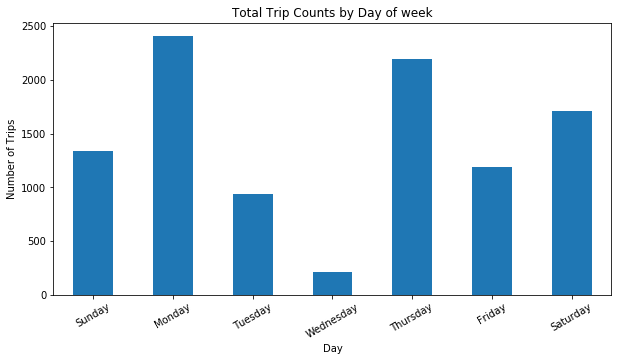

In [19]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(clean_results_df['Day Of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_week.png")
plt.show()

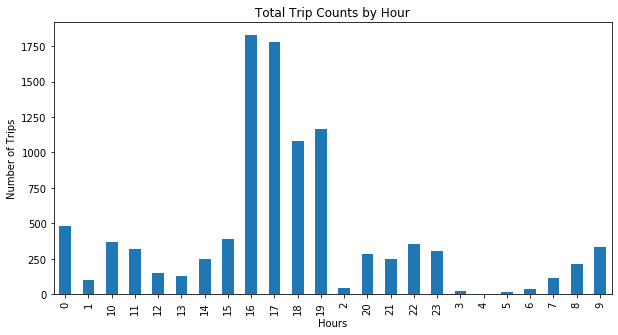

In [20]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(clean_results_df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot but xticks not sorted

In [21]:
hourly_total

,Hour
0,479
1,100
10,370
11,320
12,152
13,128
14,244
15,390
16,1827
17,1777


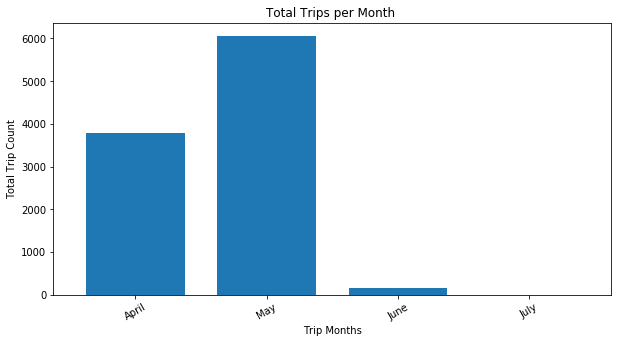

In [22]:
monthly_total = pd.DataFrame(clean_results_df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]
monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#shows correct plot but xticks not sorted

In [23]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='index', y='Month', title='Total Trip Counts by months', figsize = (10,5), legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#This graph seems to give wrong mapped values

ValueError: Length of values does not match length of index

In [ ]:
# Count how many trips started in each census GEOID tract
census_trip_start['Total Trips'] = pd.DataFrame(clean_results_df['GEOID Start'].value_counts())

# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(clean_results_df['GEOID End'].value_counts())

plt.bar(clean_results_df["GEOID Start"], census_trip_start ['Total Trips'])
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")

plt.show()